In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


Bad key "text.kerning_factor" on line 4 in
/home/Yan-Cheng-Hsu/anaconda3/envs/BPE/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
RearrangedData = { 'ppg' : [] , 'diff1ppg' : [] , 'diff2ppg' : [] , 'abp' : []}
AttributeTable = { 'systolicIndex': [] , 'systolicValue': [] , 'valleyIndex0': [] , 'valleyValue0': [] , 'hr' : [] , 'sbp' : [] , 'dbp' : [] }

In [3]:
RearrangedData['ppg'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/ppg.npy' , allow_pickle = True )
#RearrangedData['abp'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/abp.npy' , allow_pickle = True )
RearrangedData['diff1ppg'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/diff1.npy' , allow_pickle = True )
RearrangedData['diff2ppg'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/diff2.npy' , allow_pickle = True )
AttributeTable['systolicIndex'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/peakIndex.npy' , allow_pickle = True )
AttributeTable['systolicValue'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/peakValue.npy' , allow_pickle = True )
AttributeTable['valleyIndex0'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/valleyIndex.npy' , allow_pickle = True )
AttributeTable['valleyValue0'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/valleyValue.npy' , allow_pickle = True )
AttributeTable['hr'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/hr.npy' , allow_pickle = True )
AttributeTable['sbp'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/sbp.npy' , allow_pickle = True )
AttributeTable['dbp'] = np.load( '/data1/Yan-Cheng-Hsu/ppgData/f10/dbp.npy' , allow_pickle = True )

No handles with labels found to put in legend.


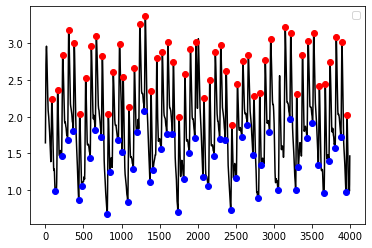

In [4]:
y = 112
Test = RearrangedData['ppg'][y]
t = np.linspace( 0 , len(Test) , len(Test) )

plt.plot( t , Test , color = 'black' )
plt.plot( AttributeTable['systolicIndex'][y] , AttributeTable['systolicValue'][y]  , 'o' , color = 'red' )
plt.plot( AttributeTable['valleyIndex0'][y] , AttributeTable['valleyValue0'][y]  , 'o' , color = 'blue' )
plt.legend( loc = 'best' )
plt.show()

In [5]:
dataperC = { 'ppg' : [] , 'diff1' : [] , 'diff2' : [] , 'sbp' : [] , 'dbp' : [] }

In [6]:
for x in range( len(RearrangedData['ppg']) ) :
    #extremely abnormal patient
    avghr = np.mean( AttributeTable['hr'][x] )
    if ( avghr > 200 ) or ( avghr < 30 ):
        continue
    if len(AttributeTable['valleyIndex0'][x]) < 2 :
        continue
    
    ppgList = []
    diff1List = []
    diff2List = []
    sbpList = []
    dbpList = []
    for i in range( 1 , len(AttributeTable['valleyIndex0'][x]) , 1 ):
        temp = []
        bp = []
        avghr = np.mean( AttributeTable['hr'][x] )
        hr = AttributeTable['hr'][x][i-1]
        sbp = AttributeTable['sbp'][x][i-1]
        dbp = AttributeTable['dbp'][x][i-1]
        pm = sbp - dbp
        
        if ( hr > (1.3*avghr) ) or ( hr < (avghr/1.3) ) or ( hr > 200 ) or ( hr < 20 ) or ( sbp > 300) or ( dbp < 20 ) or ( pm < 30 ) or ( pm > 200 ):
            continue
        else: 
            startIndex =  AttributeTable['valleyIndex0'][x][i-1]
            endIndex = AttributeTable['valleyIndex0'][x][i] + 1
            ppgList.append( RearrangedData['ppg'][x][startIndex:endIndex] )
            diff1List.append( RearrangedData['diff1ppg'][x][startIndex:endIndex] )
            diff2List.append( RearrangedData['diff2ppg'][x][startIndex:endIndex] )
            sbpList.append( sbp )
            dbpList.append( dbp )
        
    if ( len(ppgList) == 0 ) or ( len(diff1List) == 0 ) or ( len(diff2List) == 0 ) or ( len(sbpList) == 0 ) or ( len(dbpList) == 0):
        continue
    else:
        ppgList = np.array( ppgList )
        diff1List = np.array( diff1List )
        diff2List = np.array( diff2List )
        sbpList = np.array( sbpList )
        dbpList = np.array( dbpList )
        dataperC['ppg'].append( ppgList )
        dataperC['diff1'].append( diff1List )
        dataperC['diff2'].append( diff2List )
        dataperC['sbp'].append( sbpList )
        dataperC['dbp'].append( sbpList )

/home/Yan-Cheng-Hsu/anaconda3/envs/BPE/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/Yan-Cheng-Hsu/anaconda3/envs/BPE/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
RearrangedData = {}
AttributeTable = {}
ResampledData = { 'ppg' : [] , 'diff1' : [] , 'diff2' : [] , 'sbp' : [] , 'dbp' : [] }
ResampledData['sbp'] = dataperC['sbp']
ResampledData['dbp'] = dataperC['dbp']

In [8]:
sbp = ResampledData['sbp']
sbp = np.array( sbp )
dbp = ResampledData['dbp']
dbp = np.array( dbp )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/sbp.npy' , sbp )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/dbp.npy' , dbp  )

In [9]:
#Resample every cycle to 300 points
for x in range( len(dataperC['ppg']) ):
    ppgList = []
    diff1List = []
    diff2List = []
    
    for i in range( len(dataperC['ppg'][x]) ):
        #get ppg per cycle
        target = dataperC['ppg'][x][i]
        originalLength = len( target )
        finalLength = 300
        Inteval = (originalLength - 1) / (finalLength - 1)
        ppgc = []
        
        for j in range( finalLength - 1 ):
            minIndex  = math.floor( j*Inteval )
            maxIndex = minIndex + 1
            datapoint =  target[minIndex]*( maxIndex - j*Inteval ) + target[maxIndex]*( j*Inteval - minIndex )
            ppgc.append( datapoint )
        ppgc.append( target[-1] )
        
        #get diff1 per cycle
        diff1 = []
        target1 = dataperC['diff1'][x][i]
        for j in range( finalLength - 1 ):
            minIndex  = math.floor( j*Inteval )
            maxIndex = minIndex + 1
            datapoint =  target1[minIndex]*( maxIndex - j*Inteval ) + target1[maxIndex]*( j*Inteval - minIndex )
            diff1.append( datapoint )
        diff1.append( target1[-1] )
        
        #get diff2 per cycle
        diff2 = []
        target2 = dataperC['diff2'][x][i]
        for j in range( finalLength - 1 ):
            minIndex  = math.floor( j*Inteval )
            maxIndex = minIndex + 1
            datapoint =  target2[minIndex]*( maxIndex - j*Inteval ) + target2[maxIndex]*( j*Inteval - minIndex )
            diff2.append( datapoint )
        diff2.append( target2[-1] )
        
        ppgList.append( ppgc )
        diff1List.append( diff1 )
        diff2List.append( diff2 )
        
    ppgList = np.array( ppgList )
    diff1List = np.array( diff1List )
    diff2List = np.array( diff2List )
    ResampledData['ppg'].append( ppgList )
    ResampledData['diff1'].append( diff1List )
    ResampledData['diff2'].append( diff2List )

dataperC = {}
    

In [10]:
for x in range( len(ResampledData['ppg']) ):
    for i in range( len(ResampledData['ppg'][x]) ):
        if len( ResampledData['ppg'][x][i] ) != 300:
            print( 'len of ppg = ', len(ResampledData['ppg'][x][i]) )
        if len( ResampledData['diff1'][x][i] ) != 300:
            print( 'len of diff1 = ', len(ResampledData['diff1'][x][i]) )   
        if len( ResampledData['diff2'][x][i] ) != 300:
            print( 'len of diff2 = ', len(ResampledData['diff2'][x][i]) ) 

In [11]:
p1start = 0
p1end = int(len(ResampledData['ppg'])/3) 
p2start = p1end 
p2end = int(len(ResampledData['ppg'])*2/3) 
p3start = p2end
p3end = len(ResampledData['ppg']) 
ppg_part1 = ResampledData['ppg'][p1start:p1end]
ppg_part2 = ResampledData['ppg'][p2start:p2end]
ppg_part3 = ResampledData['ppg'][p3start:p3end]
diff1_part1 = ResampledData['diff1'][p1start:p1end]
diff1_part2 = ResampledData['diff1'][p2start:p2end]
diff1_part3 = ResampledData['diff1'][p3start:p3end]
diff2_part1 = ResampledData['diff2'][p1start:p1end]
diff2_part2 = ResampledData['diff2'][p2start:p2end]
diff2_part3 = ResampledData['diff2'][p3start:p3end]
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/ppg_part1.npy' , ppg_part1 )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/ppg_part2.npy' , ppg_part2 )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/ppg_part3.npy' , ppg_part3 )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/diff1_part1.npy' , diff1_part1 )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/diff1_part2.npy' , diff1_part2 )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/diff1_part3.npy' , diff1_part3 )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/diff2_part1.npy' , diff2_part1 )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/diff2_part2.npy' , diff2_part2 )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/dataperC/diff2_part3.npy' , diff2_part3 )